# Comparing global and subdomain results

In this notebook, we compare results from the global model with those from the nested model, run with open boundaries as generated by the diagnostics_ob package

## Read in pertinent metadata

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from MITgcmutils import mds

config_directory = '../../../example_configurations_compiled'


# read in global data
global_config = 'global_ocean_subdomain'
global_run_dir = config_directory+'/'+global_config+'/run'

global_x = mds.rdmds(global_run_dir + '/XC*')
global_y = mds.rdmds(global_run_dir + '/YC*')
global_d = mds.rdmds(global_run_dir + '/RC')

global_time_step = 1 # years
global_n_years = 25 # total years
global_time = np.arange(0,global_n_years+global_time_step,global_time_step)


# these are the rows/cols of the masks generated for reference
min_col = 27
max_col = 63
min_row = 18
max_row = 33


# read in subdomain data
pacific_config = 'pacific_subdomain'
pacific_run_dir = config_directory+'/'+pacific_config+'/run'

pacific_x = mds.rdmds(pacific_run_dir + '/XC*')
pacific_y = mds.rdmds(pacific_run_dir + '/YC*')
pacific_d = mds.rdmds(pacific_run_dir + '/RC')

pacific_time_step = 0.2 # years
pacific_n_years = 5 # total years
pacific_time = np.arange(0,pacific_n_years+pacific_time_step,pacific_time_step)


## Plot some comparisons of the data

### Comparison of variables on the surface at a particular timestep

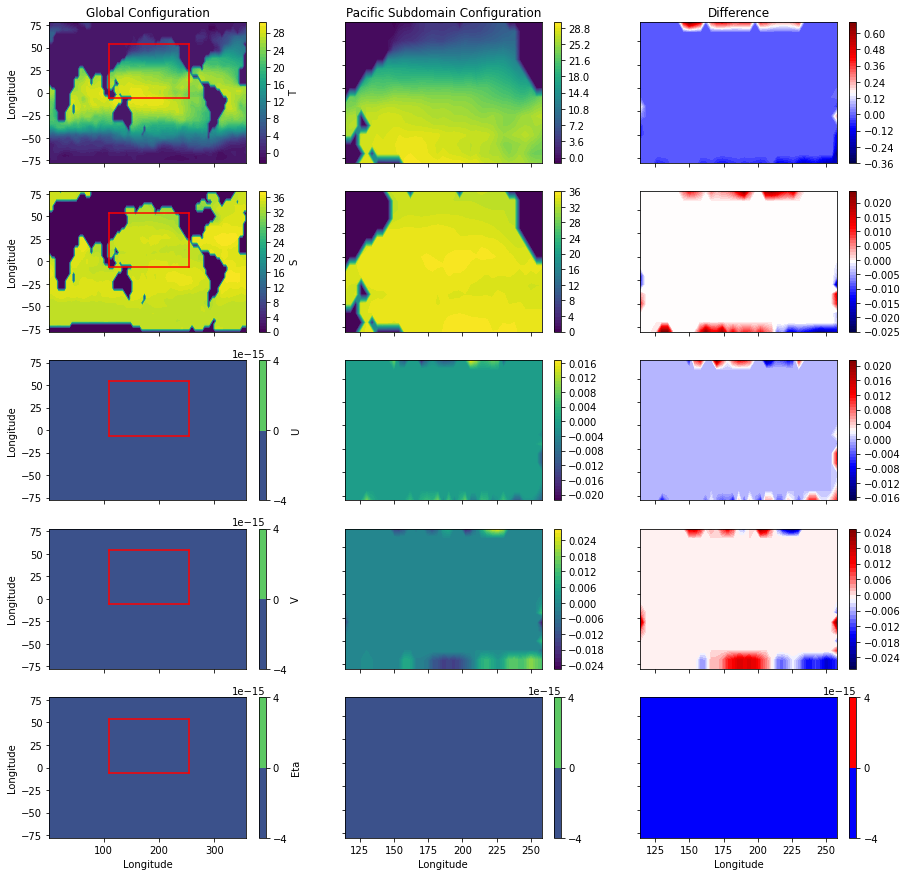

In [45]:
depth_index = 0
timestep = 0#1825

var_names = ['T','S','U','V','Eta']
n_rows = len(var_names)

fig = plt.figure(figsize=(15,15))

for vv in range(len(var_names)):
    var_name = var_names[vv]
    
    # read in global data
    global_var = mds.rdmds(global_run_dir + '/'+var_name+'*',timestep)
    if var_name!='Eta':
        global_var = global_var[depth_index,:,:]

    # make the global subset
    global_var_subset = global_var[min_row:max_row+1,min_col:max_col+1]

    # read in subdomain data
    pacific_var = mds.rdmds(pacific_run_dir + '/'+var_name+'*',timestep)
    if var_name!='Eta':
        pacific_var = pacific_var[depth_index,:,:]

    plt.subplot(n_rows,3,3*vv+1)
    CT1 = plt.contourf(global_x,global_y,global_var,50)
    plt.plot([global_x[0,min_col],global_x[0,max_col]],[global_y[min_row,min_col],global_y[min_row,min_col]],'r-')
    plt.plot([global_x[0,min_col],global_x[0,max_col]],[global_y[max_row,min_col],global_y[max_row,min_col]],'r-')
    plt.plot([global_x[min_row,min_col],global_x[min_row,min_col]],[global_y[min_row,0],global_y[max_row,0]],'r-')
    plt.plot([global_x[min_row,max_col],global_x[min_row,max_col]],[global_y[min_row,0],global_y[max_row,0]],'r-')
    cbar = plt.colorbar(CT1)
    cbar.set_label(var_name, rotation=90)
    plt.ylabel('Longitude')
    if vv==0:
        plt.title('Global Configuration')
    if vv<n_rows-1:
        plt.gca().set_xticklabels([])
    else:
        plt.xlabel('Longitude')

    plt.subplot(n_rows,3,3*vv+2)
    CT2 = plt.contourf(pacific_x,pacific_y,pacific_var,50)
    plt.colorbar(CT2)
    if vv==0:
        plt.title('Pacific Subdomain Configuration')
    plt.gca().set_yticklabels([])
    if vv<n_rows-1:
        plt.gca().set_xticklabels([])
    else:
        plt.xlabel('Longitude')

    plt.subplot(n_rows,3,3*vv+3)
    CT3 = plt.contourf(pacific_x,pacific_y,global_var_subset-pacific_var,50,cmap='seismic')
    plt.colorbar(CT3)
    if vv==0:
        plt.title('Difference')
    plt.gca().set_yticklabels([])
    if vv<n_rows-1:
        plt.gca().set_xticklabels([])
    else:
        plt.xlabel('Longitude')



plt.show()

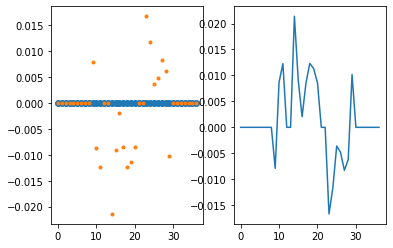

In [55]:
depth_index = 0
timestep = 0#1825

var_name = 'U'

# read in global data
global_var = mds.rdmds(global_run_dir + '/'+var_name+'*',timestep)
if var_name!='Eta':
    global_var = global_var[depth_index,:,:]

# make the global subset
global_var_subset = global_var[min_row:max_row+1,min_col:max_col+1]

# read in subdomain data
pacific_var = mds.rdmds(pacific_run_dir + '/'+var_name+'*',timestep)
if var_name!='Eta':
    pacific_var = pacific_var[depth_index,:,:]

global_test = global_var_subset[-1,:]
pacific_test = pacific_var[-1,:]
plt.subplot(1,2,1)
plt.plot(global_test,'o')
plt.plot(pacific_test,'.')
plt.subplot(1,2,2)
plt.plot(global_test-pacific_test)
plt.show()

## Comparison of the results at a particular point through time

Creating plot for T
170.0 30.0
170.0 30.0
Creating plot for S
170.0 30.0
170.0 30.0
Creating plot for U
170.0 30.0
170.0 30.0
Creating plot for V
170.0 30.0
170.0 30.0
Creating plot for Eta
170.0 30.0
170.0 30.0


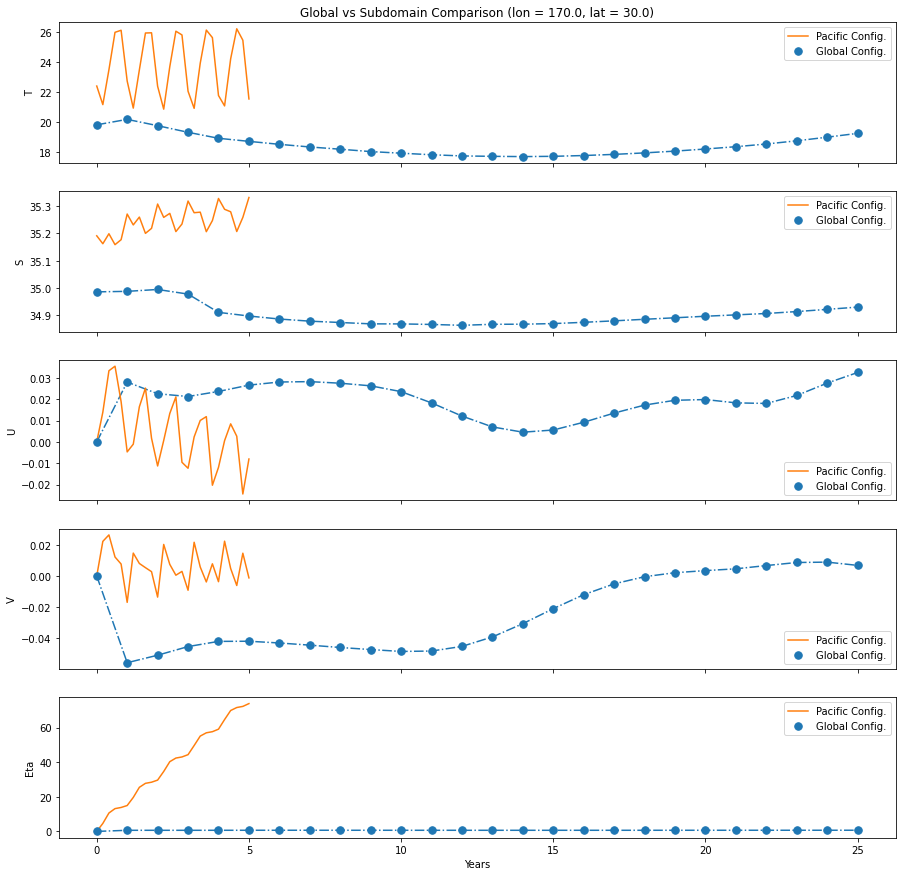

In [40]:
depth_index = 0

lon_col_pacific = 14 # column in pacific array 
lon_col_global = min_col+lon_col_pacific+1 # column in global array
lat_row_pacific = 8 # row in pacific array 
lat_row_global = min_row+lat_row_pacific+1 # row in glboal array

var_names = ['T','S','U','V','Eta']
n_rows = len(var_names)

fig = plt.figure(figsize=(15,15))

for vv in range(len(var_names)):
    var_name = var_names[vv]
    print('Creating plot for '+var_name)
    
    # read in global data
    global_var = []
    for year in global_time:
        g = mds.rdmds(global_run_dir + '/'+var_name+'*',int(year*365)) # shape is (15,40,90)
        global_var.append(g)
    global_var = np.stack(global_var)
    if var_name!='Eta':
        global_var = global_var[:,depth_index,:,:]
    global_var_timeseries = global_var[:,lat_row_global,lon_col_global]

#     # read in subdomain data
    pacific_var = []
    for year in pacific_time:
        g = mds.rdmds(pacific_run_dir + '/'+var_name+'*',int(year*365)) # shape is (15,40,90)
        pacific_var.append(g)
    pacific_var = np.stack(pacific_var)
    if var_name!='Eta':
        pacific_var = pacific_var[:,depth_index,:,:]
    pacific_var_timeseries = pacific_var[:,lat_row_pacific,lon_col_pacific]
    
    plt.subplot(n_rows,1,vv+1)
    plt.plot(global_time,global_var_timeseries,'-.')
    plt.plot(pacific_time,pacific_var_timeseries,label='Pacific Config.')
    plt.plot(global_time,global_var_timeseries,'.',markersize=15,color=u'#1f77b4',label='Global Config.')
    plt.ylabel(var_name)
    if vv<n_rows-1:
        plt.gca().set_xticklabels([])
    else:
        plt.xlabel('Years')
    if vv==0:
        plt.title('Global vs Subdomain Comparison (lon = '+str(global_x[0,lon_col_global])+', lat = '+str(global_y[lat_row_global,0])+')')
    plt.legend()
    
    

plt.show()

## Check that the surface forcing conditions are the same

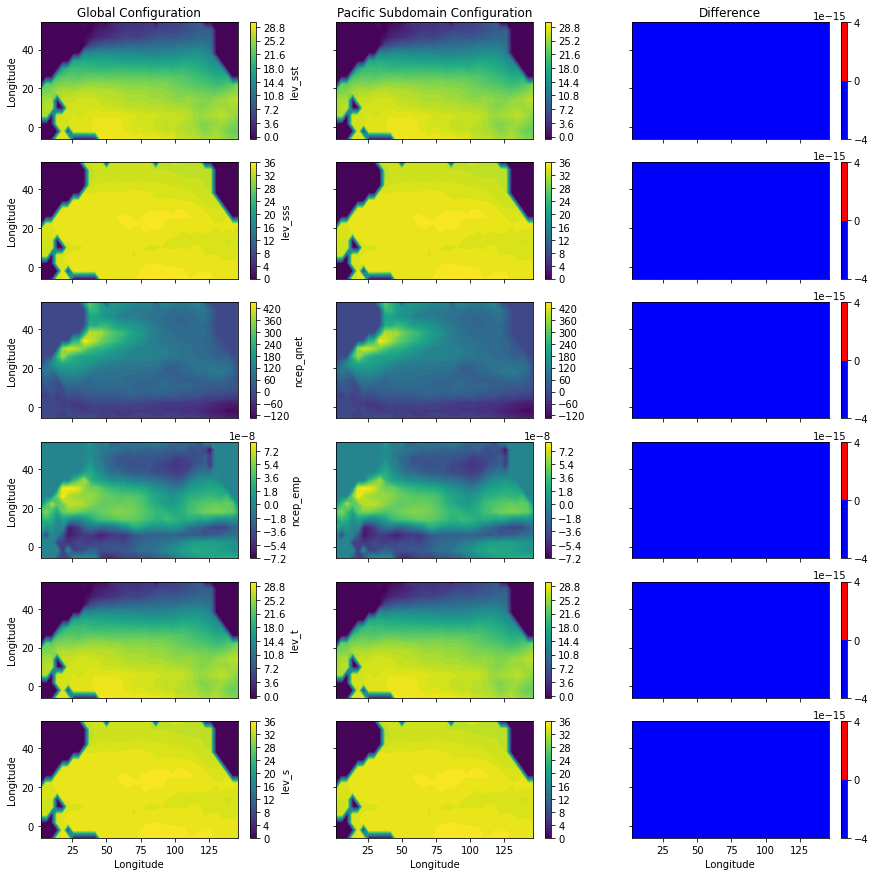

In [37]:
depth_index = 0
time_step = 0 # recall that time is periodic in these files (monthly)

var_names = ['lev_sst','lev_sss','ncep_qnet','ncep_emp','lev_t','lev_s']
n_rows = len(var_names)

fig = plt.figure(figsize=(15,15))

for vv in range(len(var_names)):
    var_name = var_names[vv]
    
    # read in global data
    global_var = np.fromfile(global_run_dir+'/'+var_name+'.bin', dtype='>f4')
    if var_name in ['lev_t','lev_s']:
        global_var = np.reshape(global_var,(12,15,40,90))
        global_var = global_var[:,depth_index,:,:]
    else:
        global_var = np.reshape(global_var,(12,40,90))
    global_var = global_var[time_step,:,:]

    # make the global subset
    global_var_subset = global_var[min_row:max_row+1,min_col:max_col+1]

    # read in subdomain data
    pacific_var = np.fromfile(pacific_run_dir+'/'+var_name+'_pacific.bin', dtype='>f4')
    if var_name in ['lev_t','lev_s']:
        pacific_var = np.reshape(pacific_var,(12,15,16,37))
        pacific_var = pacific_var[:,depth_index,:,:]
    else:
        pacific_var = np.reshape(pacific_var,(12,16,37))
    pacific_var = pacific_var[time_step,:,:]

    plt.subplot(n_rows,3,3*vv+1)
    CT1 = plt.contourf(pacific_x,pacific_y,global_var_subset,50)
    cbar = plt.colorbar(CT1)
    cbar.set_label(var_name, rotation=90)
    plt.ylabel('Longitude')
    if vv==0:
        plt.title('Global Configuration')
    if vv<n_rows-1:
        plt.gca().set_xticklabels([])
    else:
        plt.xlabel('Longitude')

    plt.subplot(n_rows,3,3*vv+2)
    CT2 = plt.contourf(pacific_x,pacific_y,pacific_var,50)
    plt.colorbar(CT2)
    if vv==0:
        plt.title('Pacific Subdomain Configuration')
    plt.gca().set_yticklabels([])
    if vv<n_rows-1:
        plt.gca().set_xticklabels([])
    else:
        plt.xlabel('Longitude')

    plt.subplot(n_rows,3,3*vv+3)
    CT3 = plt.contourf(pacific_x,pacific_y,global_var_subset-pacific_var,50,cmap='seismic')
    plt.colorbar(CT3)
    if vv==0:
        plt.title('Difference')
    plt.gca().set_yticklabels([])
    if vv<n_rows-1:
        plt.gca().set_xticklabels([])
    else:
        plt.xlabel('Longitude')





plt.show()